In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d

In [2]:
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['figure.dpi'] = 150

# Parameter

In [3]:
# Jumlah grid
NX = 100
NY = 100

# panjang interval 
LX = 10
LY = 10

# Panjang grid
dx = LX/NX
dy = LY/NY

# titik tengah
x0 = LX/2
y0 = LY/2

# data input
X = np.linspace(0, LX, NX+1) 
Y = np.linspace(0, LY, NY+1)

x, y = np.meshgrid(X, Y)

# potensial OH
V = 0.5*(x - x0)**2 + 0.5*(y - y0)**2

a = 2/np.sqrt(LX*LY)
psx, psy = np.pi/LX, np.pi/LY

# Fungsi Gelombang

In [4]:
def psi(m, n):
    """
        LX = batas sumbu x
        LY = batas sumbu y
        m = indeks sumbu x
        n = indeks sumbu y
    """
    # fungsi gelombang
    psi = a * np.sin(m*psx*x) * np.sin(n*psy*y)
    
    return psi

In [5]:
def d2psi(m, n):
    
    psix = -0.5 * -(m*psx)**2 * a * np.sin(m*psx*x) * np.sin(n*psy*y)
        
    psiy = -0.5 * -(n*psy)**2 * a * np.sin(m*psx*x) * np.sin(n*psy*y)
    
    return psix, psiy

# Index

In [6]:
ind = np.zeros([100, 2], dtype="int32")
i = 0
for p in range(1, 10+1):
    for q in range(1, 10+1):
        ind[i, 0] = p
        ind[i, 1] = q
        i += 1

# Energi Kinetik

In [7]:
rep_matriks = np.zeros([NX, NY])

for ii in range(NX):
    m = ind[ii, 0]
    n = ind[ii, 1]
    
    psi_kiri = psi(m, n)
    
    for jj in range(NY):
        p = ind[jj, 0]
        q = ind[jj, 1]
        
        element = 0.
        psi_kanan = psi(p, q)
        d2psix, d2psiy = d2psi(p, q)

        element1 = psi_kiri*(d2psix + d2psiy)
        element = np.sum(element1)

        element *= dx*dy
        rep_matriks[ii, jj] = element

# Energi Kinetik + Potensial

In [8]:
for ii in range(NX):
    m = ind[ii, 0]
    n = ind[ii, 1]

    psi_kiri = psi(m, n)

    for jj in range(NY):
        p = ind[jj, 0]
        q = ind[jj, 1]

        element = 0.
        psi_kanan = psi(p, q)

        element2 = psi_kiri*V*psi_kanan
        element = np.sum(element2)

        element *= dx*dy
        rep_matriks[ii, jj] += element

In [9]:
# menghitung nilai eigen
w, v = la.eig(rep_matriks)

In [10]:
w1 = np.sort(w)
w1

array([ 1.00007804,  2.00015553,  2.00015553,  3.00023301,  3.00735996,
        3.00735996,  4.00743745,  4.00743745,  4.00910571,  4.00910571,
        5.0091832 ,  5.0091832 ,  5.01464188,  5.14083038,  5.14083038,
        6.01638763,  6.01638763,  6.13495243,  6.13495243,  6.14090786,
        6.14090786,  7.01813338,  7.13502992,  7.13502992,  7.1481123 ,
        7.1481123 ,  7.7796768 ,  7.7796768 ,  8.14223435,  8.14223435,
        8.14985805,  8.14985805,  8.69505472,  8.69505472,  8.77975428,
        8.77975428,  9.1439801 ,  9.1439801 ,  9.28158272,  9.6951322 ,
        9.6951322 ,  9.78695872,  9.78695872, 10.27570477, 10.27570477,
       10.70233664, 10.70233664, 10.78870447, 10.78870447, 11.26982683,
       11.54921454, 11.54921454, 11.70408239, 11.70408239, 11.92042914,
       11.92042914, 12.42394573, 12.42394573, 12.54929202, 12.54929202,
       12.83580706, 12.83580706, 12.91455119, 12.91455119, 13.42402321,
       13.42402321, 13.55649646, 13.55649646, 13.82992911, 13.82

In [11]:
# energi
gs = np.min(w)
igs = np.argmin(w)

print("energi = ", gs.real)
print("indeks = ", igs)

energi =  1.0000780394493258
indeks =  0


# Plot Fungsi Gelombang

In [12]:
# koefisien ekspansi ground state
cn = v[:, igs]
cn1 = cn.reshape(10, 10)

In [13]:
gelombang = 0.

for i in range(10):
    for j in range(10):
        gelombang += cn1[i,j]*psi(i+1, j+1)

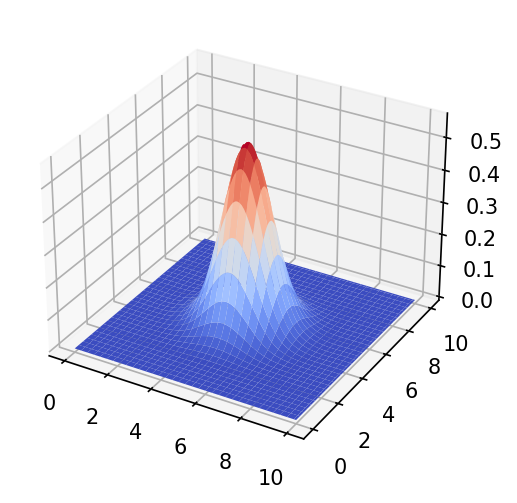

In [14]:
fig = plt.figure()
ax = plt.axes(projection="3d")

ax.plot_surface(x, y, gelombang, color="green", cmap=cm.coolwarm)
plt.show()

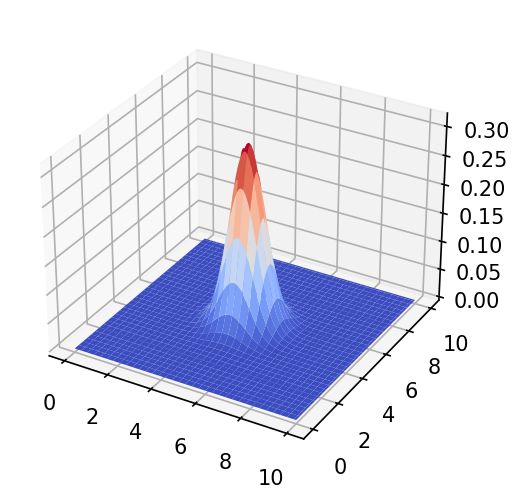

In [15]:
fig = plt.figure()
ax = plt.axes(projection="3d")

ax.plot_surface(x, y, gelombang**2, color="green", cmap=cm.coolwarm)
plt.show()

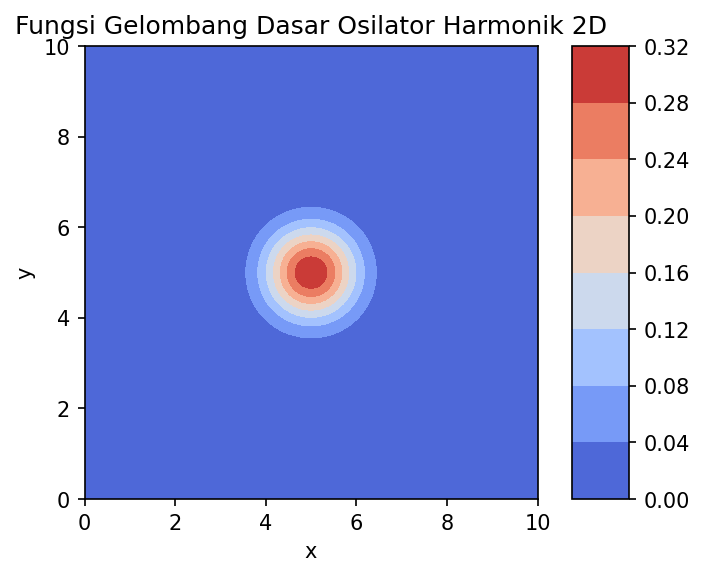

In [16]:
plt.title("Fungsi Gelombang Dasar Osilator Harmonik 2D")
plt.contourf(x, y, gelombang**2, cmap = cm.coolwarm)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(aspect=8)
plt.gca().set_aspect('equal')